### 1) Name

Joanna Jung

### 2) Project Topic/Title

Predicting Match Outcomes in League of Legends Using Logistic Regression

### 3) Inspiration

Explain the reason for your choice of data. Why is it interesting to you? Why do you think it is worth exploring for this project? Include any motivations or background that you believe is relevant. **(0.5 points)**

- I have enjoyed watching league of legend championships since Middle school and I recently started actually playing the game. I thought it would be fun to look into different components of league of legend and see how they affect the outcome. 
- The dataset contains in-game statistics, making it ideal for building a predictive model.
- The insights gained from this model can help players, analysts, and esports teams make better decisions regarding team compositions and gameplay strategies.



### 4)  Data 

- Identify and describe your data source(s). Share any related links and/or citations.
- **Using some code**, demonstrate that you have been able to read the data and (**using some code again**) give a brief overview of the data:
    - How many observations?
    - How many variables? How many of them are continuous and how many of them are categorical?
    - Are there any missing values? Will cleaning/imputing be necessary?
    - Is there any substantial correlation between the variables? This can be all variables in the data or only your variables of interest.

**(2 points)**

- Data Source: The dataset is from Kaggle’s League of Legends dataset (https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min). 
- League of Legends is a multiplayer online battle by Riot Games. 
- The dataset contains data on the first 10 minutes of solo queues from a high ELO (Diamond & Masters). 
- Each game (row) is a unique game. 
- The dataset was created by one person (Yi Lan Ma) and the expected update frequency is monthly. 

In [4]:
import pandas as pd
df = pd.read_csv("high_diamond_ranked_10min.csv") 

# print("Dataset Preview:")
# print(df.head())

print(f"Number of Observations: {df.shape[0]}")
print(f"Number of Variables: {df.shape[1]}")

Number of Observations: 9879
Number of Variables: 40


In [5]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", len(categorical_features))
print("Numerical Features:", len(numerical_features))

Categorical Features: 0
Numerical Features: 40


In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("missing values: \n", missing_values)

missing values: 
 Series([], dtype: int64)


There are no missing values, so no cleaning/imputing will be necessary

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
blueDeaths                     -0.339297
Name: blueWins, dtype: float64


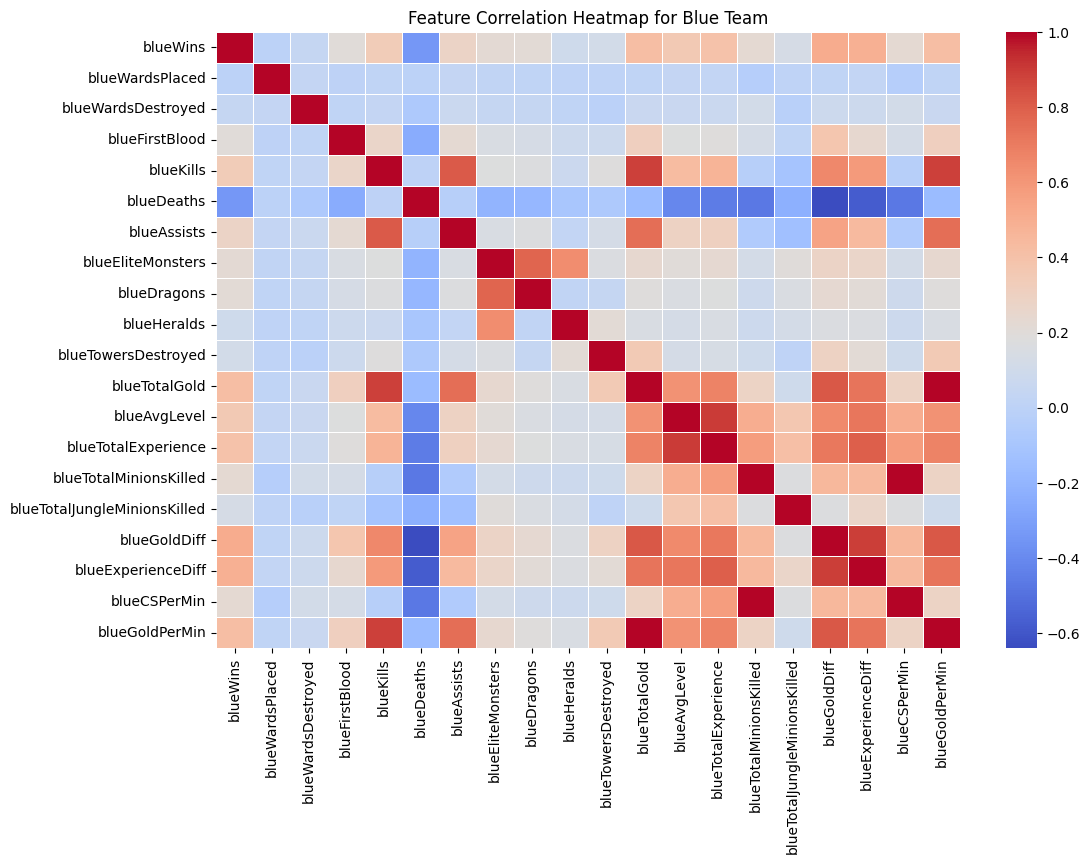

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "high_diamond_ranked_10min.csv"  
df = pd.read_csv(file_path)

blue_team_columns = [
    "blueWins", "blueWardsPlaced", "blueWardsDestroyed", "blueFirstBlood",
    "blueKills", "blueDeaths", "blueAssists", "blueEliteMonsters", "blueDragons",
    "blueHeralds", "blueTowersDestroyed", "blueTotalGold", "blueAvgLevel",
    "blueTotalExperience", "blueTotalMinionsKilled", "blueTotalJungleMinionsKilled",
    "blueGoldDiff", "blueExperienceDiff", "blueCSPerMin", "blueGoldPerMin"
]

df_filtered = df[blue_team_columns].dropna()

corr_matrix = df_filtered.corr()

blue_team_corr = corr_matrix["blueWins"].sort_values(ascending=False)

print(blue_team_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap for Blue Team")
plt.show()



The correlation analysis reveals several strong relationships between game statistics and the likelihood of winning in League of Legends. The strongest positive correlation is with gold difference (blueGoldDiff = 0.511), indicating that teams with a higher gold lead are significantly more likely to win. Similarly, experience difference (blueExperienceDiff = 0.489) shows that teams with more overall experience tend to secure victories. Other important factors include total gold earned (blueTotalGold = 0.417) and gold per minute (blueGoldPerMin = 0.417), both of which highlight the economic advantage of winning teams. Additionally, higher kills (blueKills = 0.337) and assists (blueAssists = 0.277) correlate with victory, emphasizing the role of team fights. Interestingly, objective control is also influential, as dragons taken (blueDragons = 0.214) and elite monsters secured (blueEliteMonsters = 0.222) are moderately correlated with winning. On the other hand, blueDeaths (-0.339) is negatively correlated with winning, which aligns with the expectation that dying more frequently reduces the likelihood of success.

### 5) Questions

Answer the following questions to describe your plan for the project content.

- Is this a regression or a classification problem?
- Which variable will be the response and which variables will be your predictors?
- What is your plan to develop a model? How many models are you planning to train? **Note that using a single model with all predictors at once is not acceptable. You need to start with a simple model. Keep adding predictors and observe the changes.**
- How will you explore the non-linearities in the data?
- Are there any variables that you are planning to exclude from your models? If yes, explain why.
- How will you evaluate the prediction performance of your models? Justify your choice.
- How will you perform inference on your models?

**(2 points)**

1. This is a classification problem because the target variable (blueWins) is binary (1 = Blue Team wins, 0 = Blue Team loses). The goal is to predict whether the Blue Team will win based on game statistics.

2. Response Variable (Target): blueWins (1 = Win, 0 = Lose)
- Predictors: "blueWardsPlaced", "blueWardsDestroyed", "blueFirstBlood",
    "blueKills", "blueDeaths", "blueAssists", "blueEliteMonsters", "blueDragons",
    "blueHeralds", "blueTowersDestroyed", "blueTotalGold", "blueAvgLevel",
    "blueTotalExperience", "blueTotalMinionsKilled", "blueTotalJungleMinionsKilled",
    "blueGoldDiff", "blueExperienceDiff", "blueCSPerMin", "blueGoldPerMin"

3. I plan to develop my model in stages, starting with a simple logistic regression model and progressively refining it by incorporating additional features and regularization techniques. My approach will be as follows:
- Baseline Model: A Logistic Regression model trained using only a few key predictors like gold difference (blueGoldDiff), kills (blueKills), and dragons taken (blueDragons).
- Expanded Model: Add more predictors, including assist statistics, warding information, and experience-related metrics, to test how performance changes.
- Regularized Models: Apply Ridge and Lasso Regression to optimize feature selection and prevent overfitting.
- Hyperparameter Tuning: Use LogisticRegressionCV to find the best regularization parameter (C) for Logistic Regression. By following this approach, I can gradually build model complexity while assessing the importance of each feature.

4. Since logistic regression assumes a linear decision boundary, I will analyze potential non-linear relationships in the data using visualizations. First, I will use scatter plots and histograms to examine feature distributions. If necessary, I will create interaction terms (e.g., gold per kill ratio or experience per minute) to capture relationships between multiple variables. Additionally, I will monitor the coefficients from Ridge and Lasso regression to see which variables contribute most significantly to predictions. If I later explore polynomial features or interaction terms, I will use MinMaxScaler or StandardScaler to ensure proper scaling.

5. Yes, I may exclude certain variables to prevent redundancy and improve interpretability. For instance, I will exclude Red Team features (redTotalGold, redKills, etc.), as they are simply mirrored versions of the Blue Team stats. Additionally, I will exclude gameId since it is merely an identifier with no predictive power. If I detect multicollinearity among features, I will exclude redundant variables (e.g., blueTotalGold and blueGoldPerMin, as they measure similar aspects of in-game economy).

6. Since this is a classification problem, I will evaluate my models using multiple performance metrics:
- Accuracy Score: Measures overall correctness but can be misleading in imbalanced datasets.
- Precision and Recall: Helps evaluate how well the model predicts wins vs. losses.
- ROC-AUC Score: Evaluates the model’s ability to distinguish between wins and losses across different probability thresholds.
- Confusion Matrix: Provides insight into false positives and false negatives, which will help fine-tune model thresholds. 

7. For logistic regression models, I will analyze the coefficients to understand which factors have the greatest impact on winning. For regularized models, I will examine which variables are retained or shrunk to zero, which can help identify the most influential predictors.


### 6) Stakeholders

Who would be the stakeholders of this project, i.e. who would be interested in hearing your results and how would those results benefit them? **(0.5 points)**

- Esports Coaches & Analysts – They can use the insights from this model to optimize game strategies. By understanding which in-game factors (e.g., gold difference, objective control, early kills) contribute most to winning, analysts can focus on the most impactful areas during training sessions.
- League of Legends Players – Competitive and ranked players can benefit from knowing which key statistics influence match outcomes. This information can help them prioritize objectives such as securing dragons or maintaining a gold lead.
- Game Developers – The insights from this project could be valuable for game balancing. If the model finds that certain features (e.g., early kills or dragons) have an overwhelming influence on victory, Riot Games could adjust gameplay mechanics to ensure more balanced matches.